# Match Analysis

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data cleaning and Exploration

In [45]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]

In [46]:
matches.shape

(756, 14)

In [47]:
dicti = {"Delhi Daredevils":"Delhi Capitals"}
matches["team1"]=matches["team1"].replace(dicti)
matches["team2"]=matches["team2"].replace(dicti)
matches["toss_winner"]=matches["toss_winner"].replace(dicti)
matches["winner"]=matches["winner"].replace(dicti)

In [48]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Rising Pune Supergiants'], dtype=object)

## Taking in consideration only DC VS MI matches

In [49]:
DM =matches[np.logical_or(np.logical_and(matches['team1']=='Mumbai Indians',matches['team2']=='Delhi Capitals'),
                            np.logical_and(matches['team2']=='Mumbai Indians',matches['team1']=='Delhi Capitals'))]

In [50]:
DM.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium
44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla
82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy
109,2008,Delhi,2008-05-24,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,KD Karthik,Feroz Shah Kotla
150,2009,East London,2009-05-08,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Delhi Capitals,0,7,A Nehra,Buffalo Park


In [51]:
DM.shape

(24, 14)

In [52]:
DM.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [53]:
DM.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [54]:
DM.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,24.0,27.875000,36.321406,0.0,0.0,14.5,37.50,146.0
win_by_wickets,24.0,2.416667,3.322082,0.0,0.0,0.0,5.25,9.0


## HEAD TO HEAD

In [55]:
DM.groupby("winner")["winner"].count()

winner
Delhi Capitals    12
Mumbai Indians    12
Name: winner, dtype: int64

Text(0.5, 1.0, 'MI VS DC-head to head')

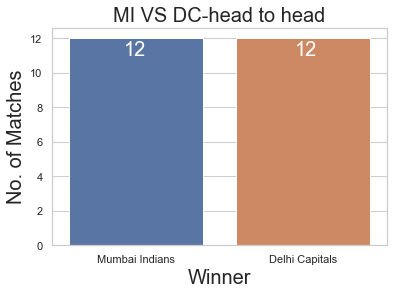

In [56]:
sns.countplot(DM["winner"])
plt.text(-0.07,11,str(DM['winner'].value_counts()['Mumbai Indians']),size=20,color='white')
plt.text(0.95,11,str(DM['winner'].value_counts()['Delhi Capitals']),size=20,color='white')
plt.xlabel('Winner',fontsize=20)
plt.ylabel('No. of Matches',fontsize=20)
plt.title('MI VS DC-head to head',fontsize = 20)

In [57]:
Season_wise_Match_Winner = pd.DataFrame(DM.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner.columns = ["winner count"]

print("Season wise winner of matches between MI VS DC :")
Season_wise_Match_Winner

Season wise winner of matches between MI VS DC :


winner count
season winner                      
2008   Delhi Capitals             1
       Mumbai Indians             1
2009   Delhi Capitals             2
2010   Mumbai Indians             2
2011   Mumbai Indians             2
2012   Delhi Capitals             2
2013   Delhi Capitals             1
       Mumbai Indians             1
2014   Delhi Capitals             1
       Mumbai Indians             1
2015   Delhi Capitals             1
       Mumbai Indians             1
2016   Delhi Capitals             1
       Mumbai Indians             1
2017   Mumbai Indians             2
2018   Delhi Capitals             2
2019   Delhi Capitals             1
       Mumbai Indians             1

## Winning Percentage

In [58]:
Winning_Percentage = DM['winner'].value_counts()/len(DM['winner'])

In [59]:
print("MI winning percentage against DC(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("DC winning percentage against MI(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

MI winning percentage against DC(overall) : 50%
DC winning percentage against MI(overall) : 50%


## Performance Analysis

In [60]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [61]:
performance("Mumbai Indians",DM)

Number of times given team win while defending : 10
Number of times given team win while chasing   : 2

Average runs by which a given team wins while defending  :  54.0
Average wickets by which a given team wins while chasing :  6.0


In [62]:
performance("Delhi Capitals",DM)

Number of times given team win while defending : 5
Number of times given team win while chasing   : 7

Average runs by which a given team wins while defending  :  26.0
Average wickets by which a given team wins while chasing :  6.0


## Toss Analysis

From here we can see that both the teams have opposite past records i.e MI has better winning chances if they defend the score and for DC, they have better stats while chasing the score. 

In [63]:
Toss_Decision = pd.DataFrame(DM.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner    toss_decision               
Delhi Capitals bat                        3
               field                     11
Mumbai Indians bat                        6
               field                      4

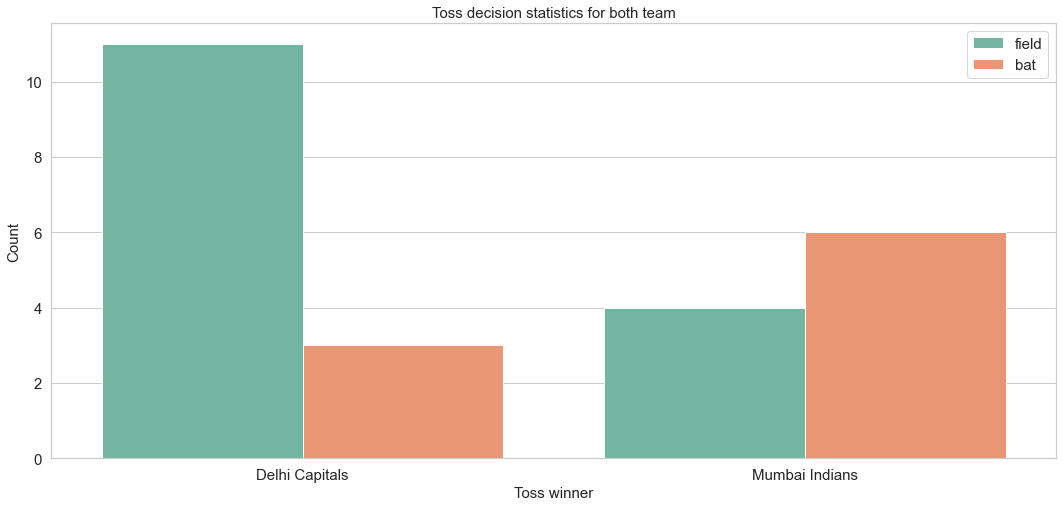

In [64]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(DM['toss_winner'],palette='Set2',hue=DM['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [65]:
Toss_Decision_based_Winner = pd.DataFrame(DM.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner    toss_decision winner                
Delhi Capitals bat           Delhi Capitals       1
                             Mumbai Indians       2
               field         Delhi Capitals       4
                             Mumbai Indians       7
Mumbai Indians bat           Delhi Capitals       3
                             Mumbai Indians       3
               field         Delhi Capitals       4

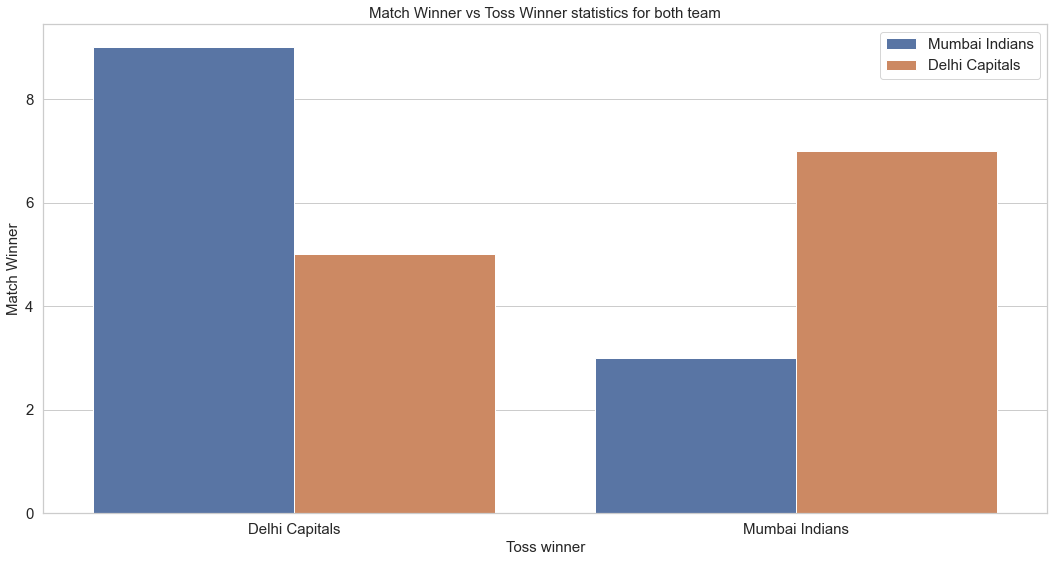

In [66]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(DM['toss_winner'],hue=DM['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

### Toss Decision based Analysis of both the teams seperately :

In [67]:
MI = DM[DM["toss_winner"]=="Mumbai Indians"]
DC = DM[DM["toss_winner"]=="Delhi Capitals"]

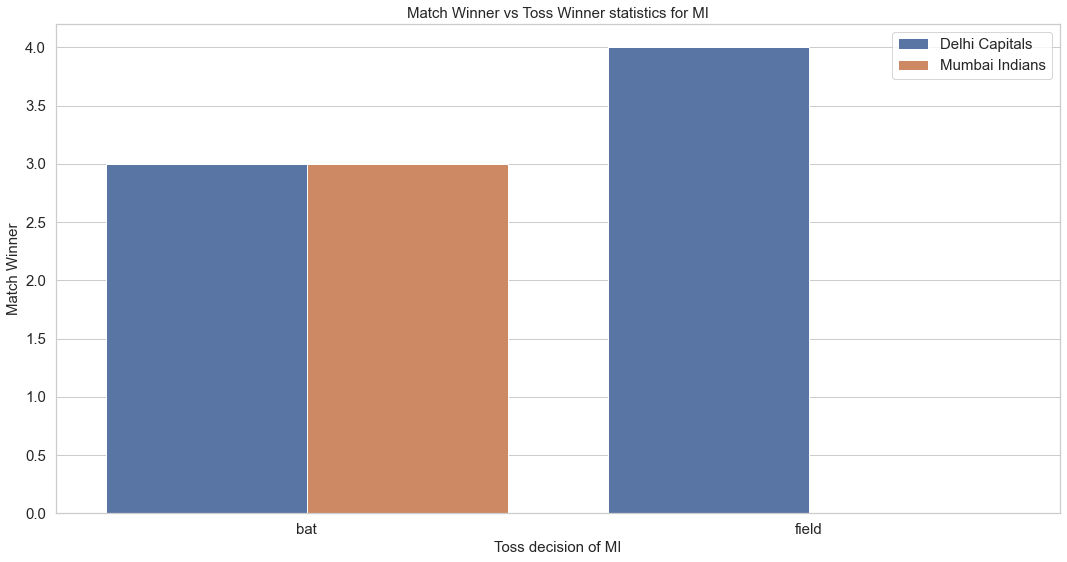

In [68]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(MI['toss_decision'],hue=MI['winner'])
plt.title('Match Winner vs Toss Winner statistics for MI',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of MI',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

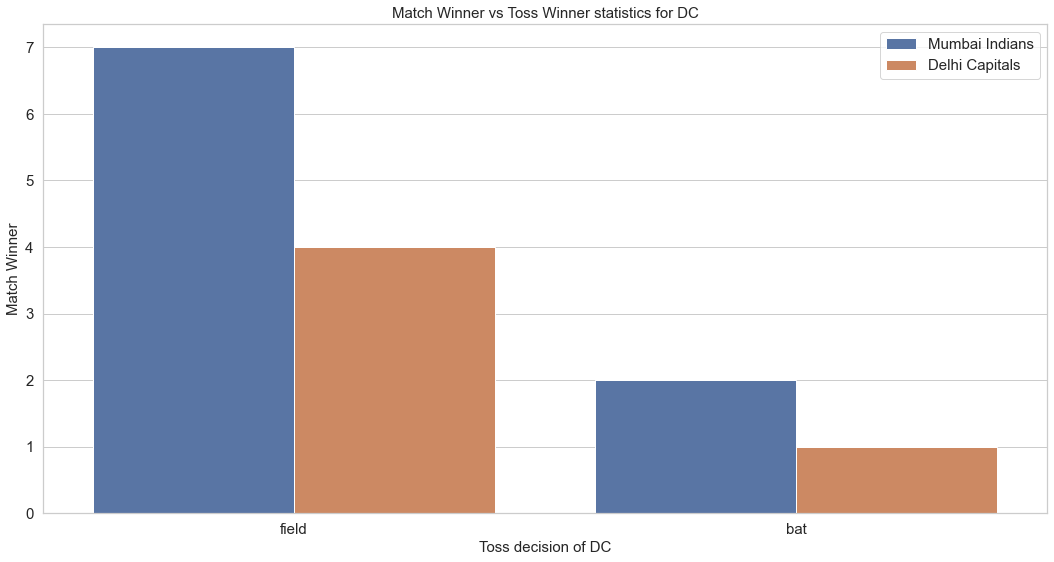

In [69]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(DC['toss_decision'],hue=DC['winner'])
plt.title('Match Winner vs Toss Winner statistics for DC',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of DC',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

In [70]:
player_of_the_match = pd.DataFrame(DM.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
V Sehwag,3
KD Karthik,2
LMP Simmons,1
SV Samson,1
MJ McClenaghan,1
HH Pandya,1
AT Rayudu,1
Harbhajan Singh,1
M Vijay,1
KA Pollard,1


## Recent Years Performance Analysis

In [71]:
cond2 = DM["season"] == 2018
cond3 = DM["season"] == 2019
final = DM[cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7902,2018,Mumbai,14/04/18,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,7,JJ Roy,Wankhede Stadium
7948,2018,Delhi,20/05/18,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,normal,0,Delhi Capitals,11,0,A Mishra,Feroz Shah Kotla
11139,2019,Mumbai,24/03/19,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Capitals,37,0,RR Pant,Wankhede Stadium
11325,2019,Delhi,18/04/19,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Mumbai Indians,40,0,HH Pandya,Feroz Shah Kotla Ground


In [72]:
final.shape

(4, 14)

In [73]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
RR Pant,1
JJ Roy,1
HH Pandya,1
A Mishra,1


Text(0, 0.5, 'Win Count')

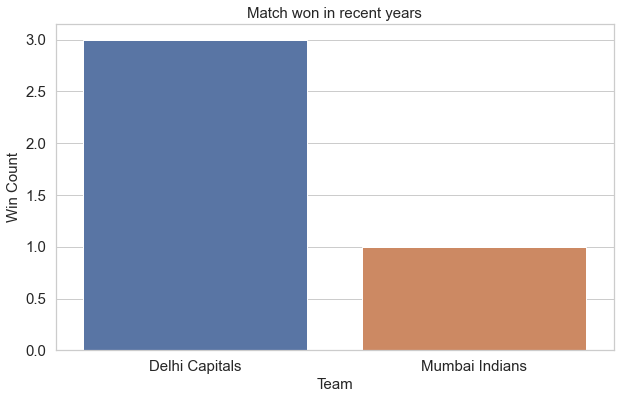

In [74]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)

From all the above analysis related to Head to Head , Toss analysis, Performance Analysis, Recent year analysis etc we can predict that in recent years DC has shown good performance against MI. But considering toss based decision also we can predict that if MI bat first then they have better chances to win the match as per their previous records.